##  Case Study : Lead scoring

#### Problem Statement:
An education company named X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google.When these people fill up a form providing their email address or phone number, they are classified to be a lead.Once these leads are acquired, employees from the sales team start making calls, writing emails, etc.Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.Although X Education gets a lot of leads, its lead conversion rate is very poor.To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’.
The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%

### Importing the data and Inspecting the dataframe

In [ ]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [149]:
# Importing Pandas , NumPy, Matplotlib
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
# Importing datasets
leads_data = pd.read_csv("C:\\Users\\Laptop\\Downloads\\main course\\week16_lead_scoring_case_study\\Lead_Scoring_Case_Study\\Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [62]:
# dimensions of the dataframe
leads_data.shape

(9240, 37)

In [63]:
# statistical aspects of the dataframe
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [64]:
# type of each column
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [65]:
#Checking the number of nulls 
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [66]:
# Checking the percentage of missing values
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Data cleansing and preparation

In [151]:
#identifying the columns having more than 35% of null values
cut_off=35
cols_to_drop=list(leads_data.columns[100*leads_data.isnull().mean()>cut_off]) #calculating % of null values
print(cols_to_drop)
print("No. of columns to drop: ",len(cols_to_drop))

['Tags', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
No. of columns to drop:  6


In [152]:
#To identify the variance in data values in different columns
for col in leads_data.columns:
    print(leads_data[col].astype('category').value_counts())

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search

In [153]:
#dropping the cols with more than 35% missing value and columns with skewed/less variance data
leads_data.drop(['Tags','Do Not Call','Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses'], axis=1, inplace=True)

In [154]:
# Checking the percentage of missing values
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
City                                             15.37
A free copy of Mastering The Interview            0.00
Last Notab

In [155]:
#Checking the number of nulls 
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Lead Profile                                     2709
City                                             1420
A free copy of Mastering The Interview              0
Last Notable Activity       

In [156]:
#Columns having null values
null_col_list=['Lead Source','TotalVisits','Page Views Per Visit','Last Activity','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Lead Profile','City','Country']

In [157]:
#Dropping the rows with null values in the null column list
for col in null_col_list:
    leads_data=leads_data[~pd.isnull(leads_data[col])]

In [158]:
#Checking the number of nulls 
leads_data.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Lead Profile                                     0
City                                             0
A free copy of Mastering The Interview           0
Last Notable Activity                            0
dtype: int64

### Univariate and Bivariate Analysis

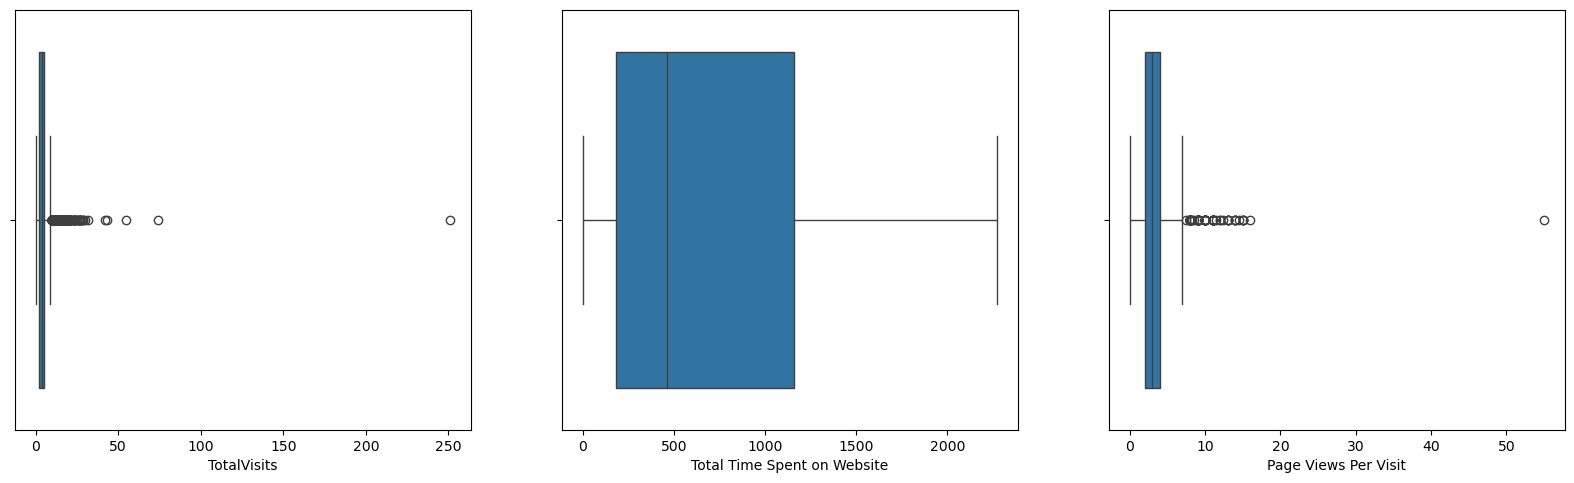

In [159]:
#Distribution of numeric variables using boxplot
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'TotalVisits', data = leads_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'Total Time Spent on Website', data = leads_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'Page Views Per Visit', data = leads_data)
plt.show()

In [160]:
#Creating a function to generate graphs as subplots for the dataset and columns passed as argument to the function.
def plot_graph(dataset, col):
    fig = plt.figure(figsize=(15,10),tight_layout=True)
    
    ax1 = plt.subplot(221)
    dataset[col].value_counts(normalize=True).plot.bar(ax=ax1)  #Creates Bar graph showing % values of the column
    plt.xticks(rotation=90)
    plt.title('% Distribution of the column : '+ col,fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Black'})

    ax2 = plt.subplot(222)
    pd.crosstab(dataset[col],leads_data.Converted).plot.bar(ax=ax2)  #Creates Bar graph showing Column Vs Target variable in terms of total count
    plt.xticks(rotation=90)
    plt.title(col +' vs Converted in terms of total count', fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Black'})
    plt.show()

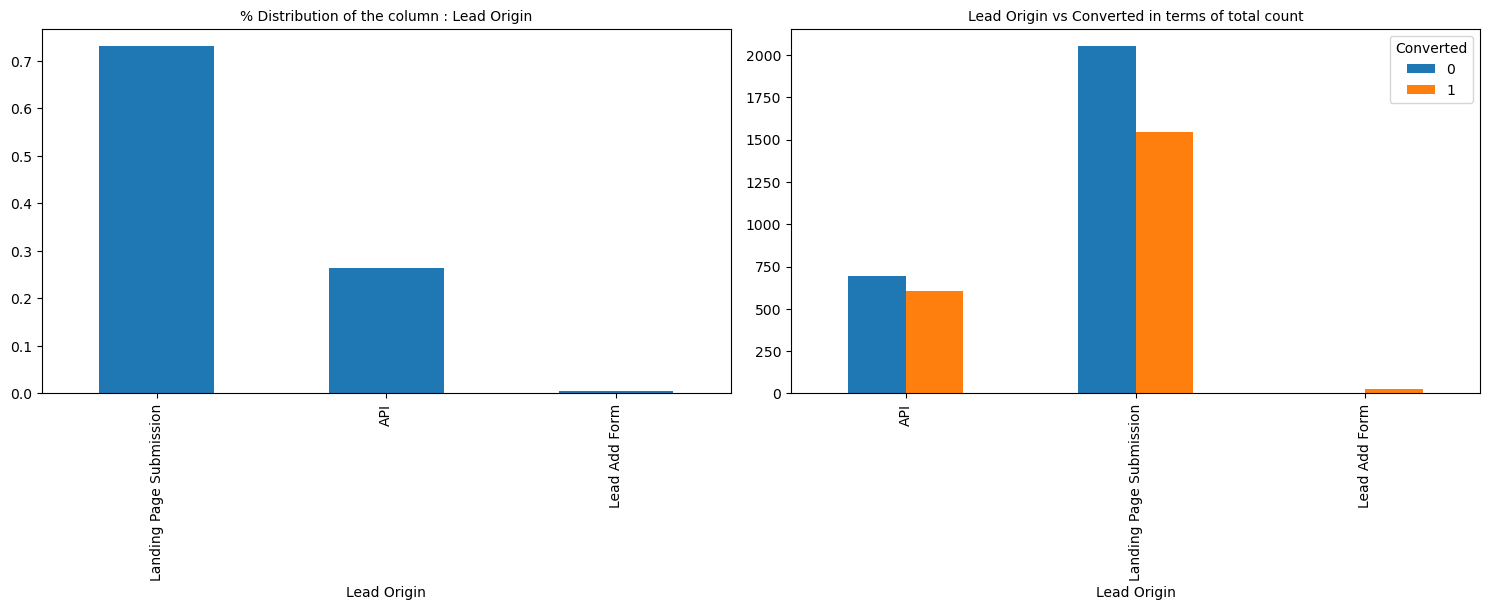

In [161]:
plot_graph(leads_data,'Lead Origin')

Most of the leads generated are from the landing page followed by API

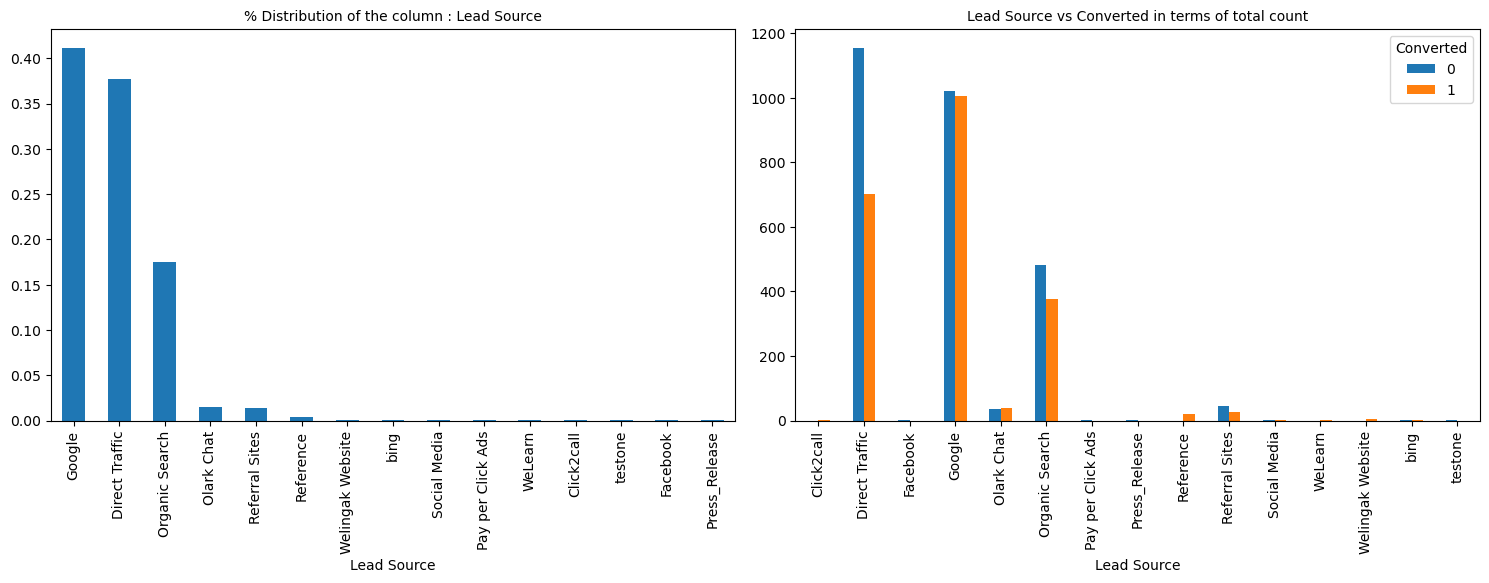

In [162]:
plot_graph(leads_data,'Lead Source')

Most of the leads are generated from Google and Direct traffic. The leads converted are more from Google compared to other lead sources

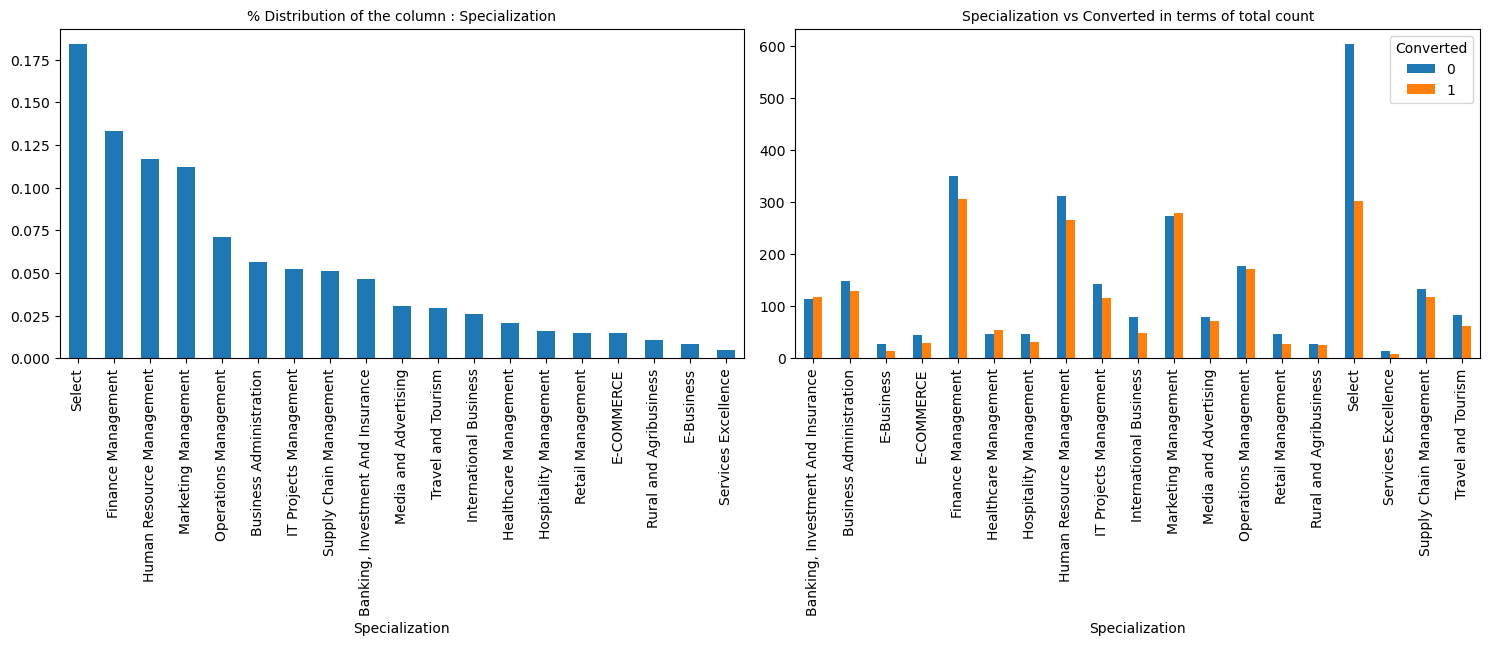

In [163]:
plot_graph(leads_data,'Specialization')

People from Marketing and Finance background have chosen the courses

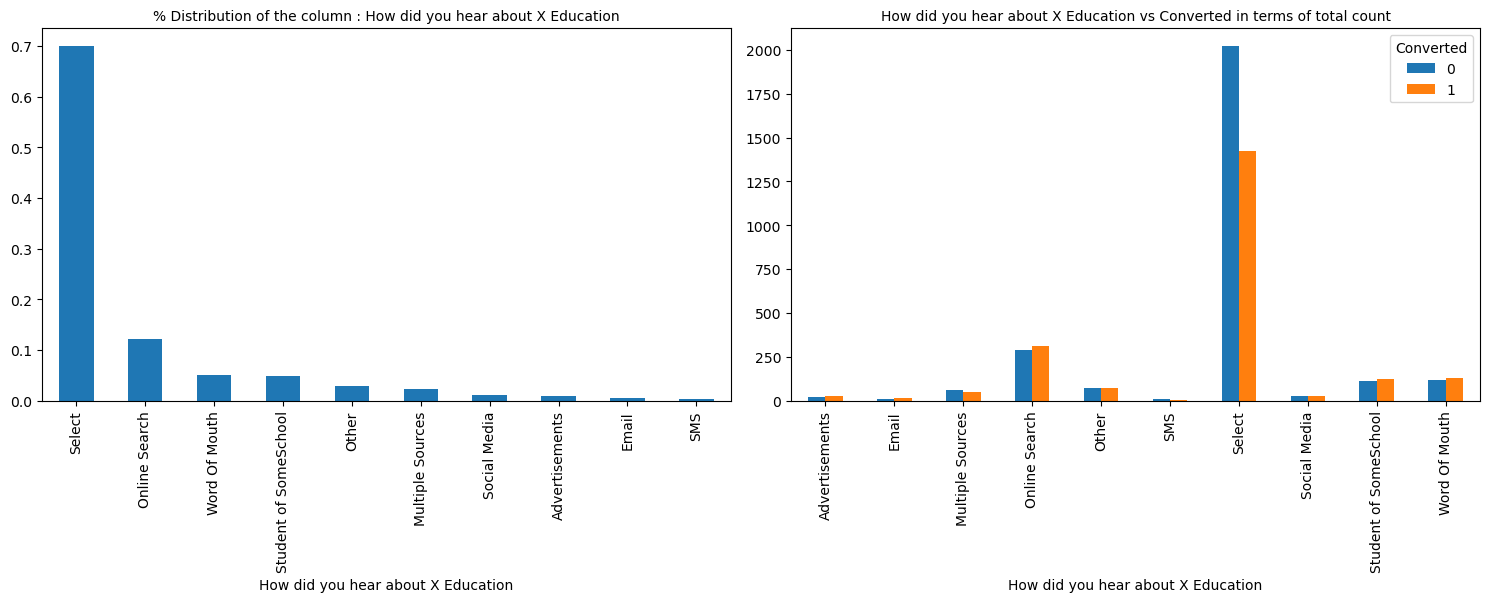

In [164]:
plot_graph(leads_data,'How did you hear about X Education')

In [ ]:
Leads generated have got to know about the courses through online search

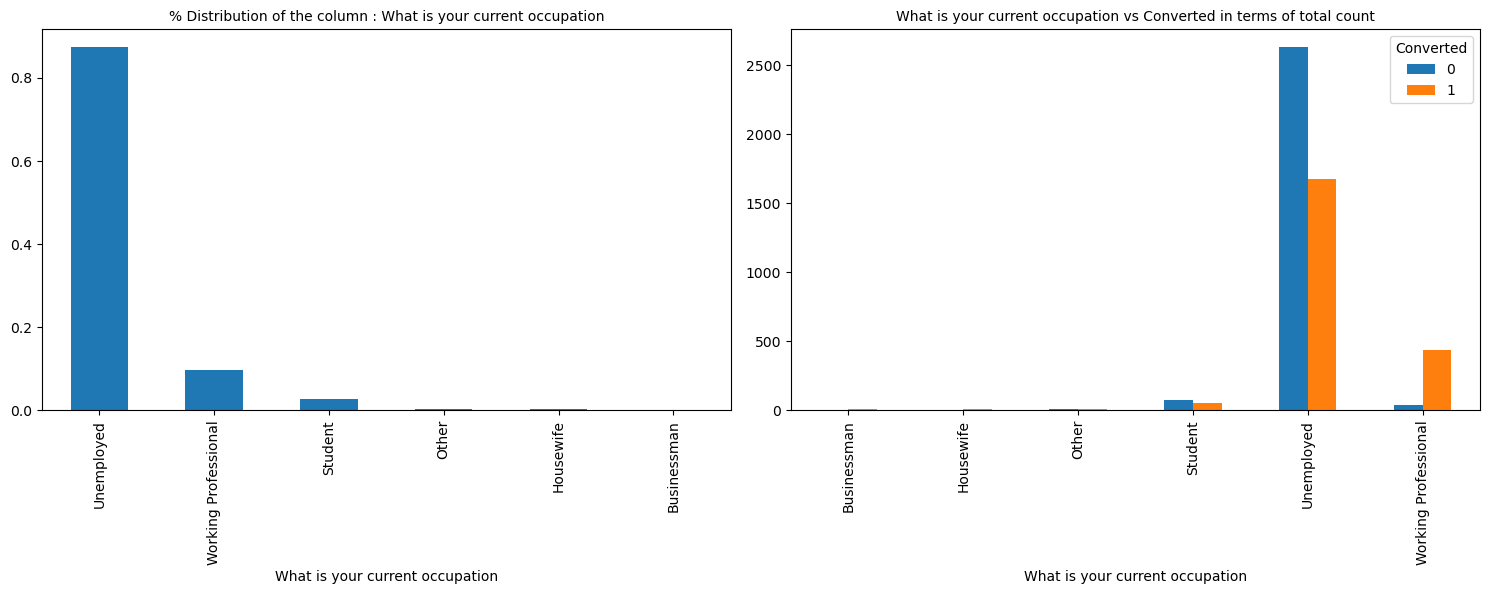

In [165]:
plot_graph(leads_data,'What is your current occupation')

People who have chosen the course are unemployed and looking for better prospects as shown in below graph

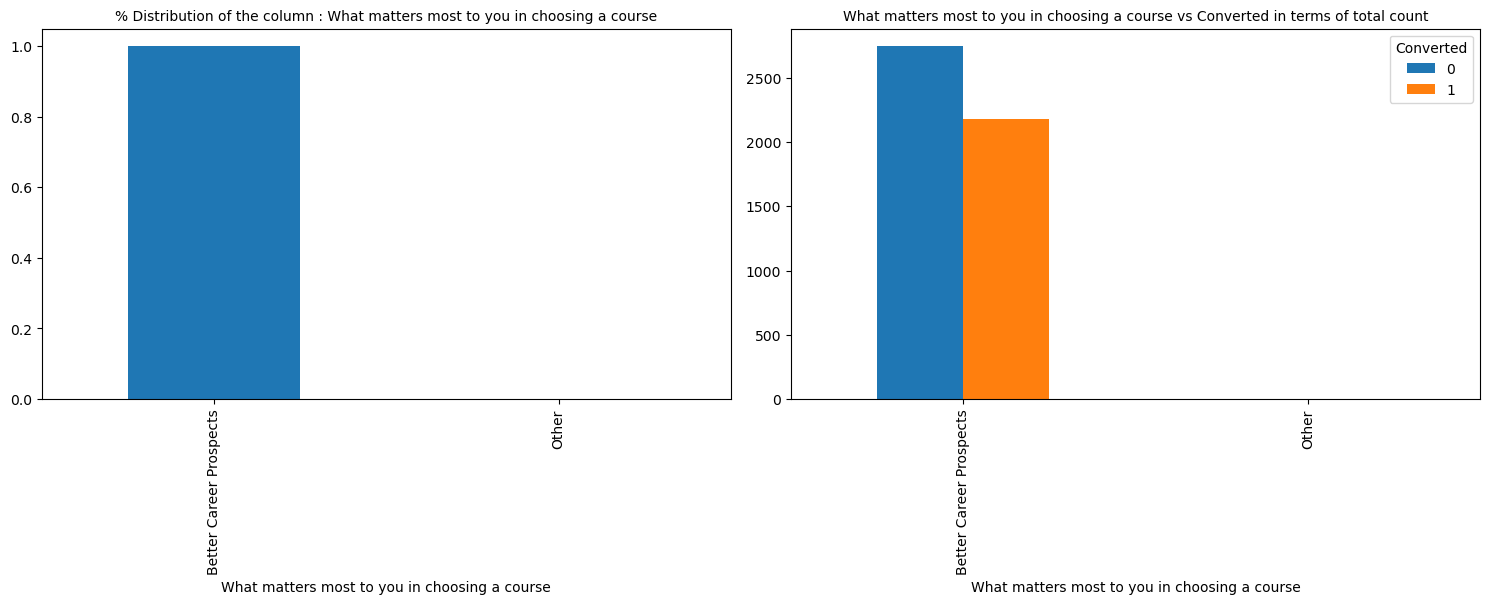

In [166]:
plot_graph(leads_data,'What matters most to you in choosing a course')

#### Outlier treatment

In [168]:
# Checking for outliers in the continuous variables
leads_data_num = leads_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [169]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
leads_data_num.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,4925.000000,4925.000000,4925.000000
mean,4.586599,676.550254,3.157206
std,5.074152,554.561259,1.968820
min,0.000000,0.000000,0.000000
25%,2.000000,183.000000,2.000000
50%,4.000000,461.000000,3.000000
75%,5.000000,1156.000000,4.000000
90%,8.000000,1492.600000,5.000000
95%,11.000000,1637.000000,7.000000
99%,19.000000,1875.520000,10.000000


In [170]:
#Calculating the 5% and 99% of the numeric variables TotalVisits
p_99 = leads_data['TotalVisits'].quantile(0.99) # 99th quantile
p_05 = leads_data['TotalVisits'].quantile(0.05) # 99th quantile

In [171]:
#Capping the outlier to the 99th percentile
leads_data['TotalVisits'].clip(p_05,p_99, inplace=True)

In [172]:
#Calculating the 5% and 99% of the numeric variables Page Views Per Visit
p_99 = leads_data['Page Views Per Visit'].quantile(0.99) # 99th quantile
p_05 = leads_data['Page Views Per Visit'].quantile(0.05) # 99th quantile

In [ ]:
##Capping the outlier to the 99th percentile
leads_data['Page Views Per Visit'].clip(p_05,p_99, inplace=True)

In [173]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
leads_data.describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,4925.000000,4925.000000,4925.000000,4925.000000,4925.000000
mean,616303.240406,0.442234,4.522640,676.550254,3.132164
std,23658.355280,0.496702,3.140648,554.561259,1.744249
min,579533.000000,0.000000,2.000000,0.000000,1.000000
5%,582555.200000,0.000000,2.000000,33.200000,1.000000
25%,595269.000000,0.000000,2.000000,183.000000,2.000000
50%,613544.000000,0.000000,4.000000,461.000000,3.000000
75%,637539.000000,1.000000,5.000000,1156.000000,4.000000
90%,649857.600000,1.000000,8.000000,1492.600000,5.000000
95%,655654.400000,1.000000,11.000000,1637.000000,7.000000


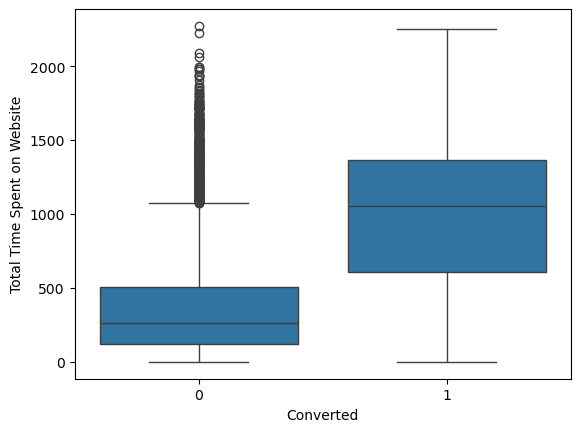

In [174]:
#Create boxplot for Total Time Spent on Website vs Converted
sns.boxplot(data=leads_data,x="Converted", y="Total Time Spent on Website")
plt.show()

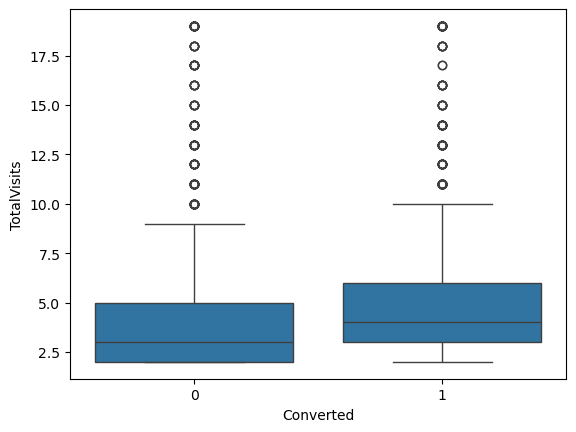

In [175]:
#Create boxplot for Total Time Spent on Website vs Converted
sns.boxplot(data=leads_data,x="Converted", y="TotalVisits")
plt.show()

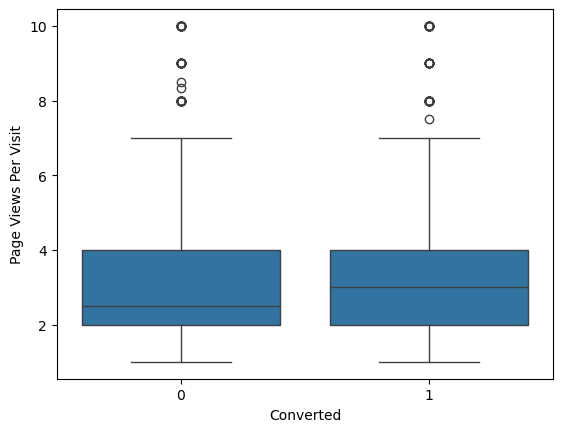

In [176]:
#Create boxplot for Total Time Spent on Website vs Converted
sns.boxplot(data=leads_data,x="Converted", y="Page Views Per Visit")
plt.show()

In [177]:
#Dropping ID columns like Prospect ID and Lead number
leads_data.drop(['Prospect ID','Lead Number'], axis=1, inplace=True)

In [178]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4925 entries, 1 to 9239
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    4925 non-null   object 
 1   Lead Source                                    4925 non-null   object 
 2   Do Not Email                                   4925 non-null   object 
 3   Converted                                      4925 non-null   int64  
 4   TotalVisits                                    4925 non-null   float64
 5   Total Time Spent on Website                    4925 non-null   int64  
 6   Page Views Per Visit                           4925 non-null   float64
 7   Last Activity                                  4925 non-null   object 
 8   Country                                        4925 non-null   object 
 9   Specialization                                 4925 non-n

In [179]:
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,Select,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,Potential Lead,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,2.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Select,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,Select,Mumbai,No,Modified
6,Landing Page Submission,Google,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,Potential Lead,Mumbai,No,Modified


In [180]:
# Converting some binary variables (Yes/No) to 0/1

varlist =  ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the list
leads_data[varlist] = leads_data[varlist].apply(binary_map)

In [181]:
#Creating a list of columns of object type
obj_list=leads_data.select_dtypes(include=['object'])

In [182]:
#Object column list
obj_list.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Lead Profile', 'City',
       'Last Notable Activity'],
      dtype='object')

In [183]:
#Checking for value 'Select' in different object columns
 for col in obj_list.columns:
    print(leads_data[col].astype('category').value_counts())

Lead Origin
Landing Page Submission    3598
API                        1300
Lead Add Form                27
Name: count, dtype: int64
Lead Source
Google               2028
Direct Traffic       1856
Organic Search        860
Olark Chat             73
Referral Sites         71
Reference              21
Welingak Website        5
bing                    3
Social Media            2
Click2call              1
Facebook                1
Pay per Click Ads       1
Press_Release           1
WeLearn                 1
testone                 1
Name: count, dtype: int64
Last Activity
Email Opened                    1918
SMS Sent                        1634
Page Visited on Website          397
Converted to Lead                285
Olark Chat Conversation          203
Email Bounced                    152
Email Link Clicked               123
Form Submitted on Website         81
Unreachable                       65
Unsubscribed                      35
Had a Phone Conversation          22
Approached upfron

#### Creating dummy variables for categorical variables

In [185]:
#Creating dummy variables
dummy_var=pd.get_dummies(leads_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'What is your current occupation','What matters most to you in choosing a course','Last Notable Activity']],dtype=int,drop_first=True)

In [186]:
#Concatenating the dataset with the dummy variables created for the above list of columns
leads_data=pd.concat([leads_data,dummy_var],axis=1)

In [187]:
#Creating dummy variables for columns having 'Select' value in them
dummy_nonselect=pd.get_dummies(leads_data[['Specialization','How did you hear about X Education','Lead Profile','City']],dtype=int)

In [188]:
#Dropping the variable/column created for the value 'Select' as it doesnt add any value to the dataset
dummy_nonselect=dummy_nonselect.drop(['Specialization_Select','How did you hear about X Education_Select','Lead Profile_Select','City_Select'], axis=1)

In [189]:
#Concatenating the dataset with the dummy variables created for the above list of columns
leads_data=pd.concat([leads_data,dummy_nonselect],axis=1)

In [190]:
#Dropping original columns for which dummies are created
leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'What is your current occupation','What matters most to you in choosing a course','Last Notable Activity','Specialization','How did you hear about X Education','Lead Profile','City'], axis=1, inplace=True)

#### Test Train Split

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
# Putting feature variable to X
X = leads_data.drop(['Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
3,0,2.0,305,1.0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6,0,2.0,1640,2.0,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [193]:
# Putting target variable to y
y = leads_data['Converted']

y.head()

1    0
2    1
3    0
4    1
6    1
Name: Converted, dtype: int64

In [194]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [195]:
from sklearn.preprocessing import StandardScaler

In [196]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
7442,0,-0.801835,1.701466,-0.653149,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6273,0,0.799698,-0.378271,2.250330,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
6160,0,-0.801835,0.103050,-0.653149,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
609,0,0.159085,-1.213398,-0.844778,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4543,0,-0.161222,-0.450110,0.508243,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [197]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
count,3447.000000,3.447000e+03,3.447000e+03,3.447000e+03,3447.000000,3447.00000,3447.000000,3447.000000,3447.000000,3447.000000,...,3447.000000,3447.000000,3447.000000,3447.000000,3447.000000,3447.000000,3447.000000,3447.000000,3447.000000,3447.000000
mean,0.070786,-8.760681e-18,-3.504272e-17,6.596277e-17,0.437482,0.73020,0.004932,0.387874,0.000290,0.403829,...,0.003481,0.085292,0.214099,0.035683,0.468523,0.091674,0.064694,0.054250,0.105889,0.009574
std,0.256505,1.000145e+00,1.000145e+00,1.000145e+00,0.496148,0.44392,0.070064,0.487336,0.017033,0.490735,...,0.058908,0.279356,0.410255,0.185526,0.499081,0.288607,0.246021,0.226543,0.307740,0.097389
min,0.000000,-8.018349e-01,-1.220582e+00,-1.233844e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-8.018349e-01,-8.919192e-01,-6.531488e-01,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-1.612219e-01,-3.926387e-01,-7.245304e-02,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.590846e-01,8.780123e-01,5.082427e-01,1.000000,1.00000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,4.643376e+00,2.859869e+00,3.992417e+00,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [198]:
### Checking the Conversion Rate
conversion = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
conversion

44.22335025380711

In [199]:
#Checking the correlations between columns
leads_data.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
Do Not Email,1.000000,-0.167163,-0.010192,-0.091112,-0.008783,0.043377,0.071855,-0.020975,0.083001,-0.004026,...,0.001780,0.019274,-0.064032,0.103277,0.012233,0.006582,-0.018475,0.038517,0.000216,0.031563
Converted,-0.167163,1.000000,0.108796,0.493151,0.043719,-0.047809,-0.040689,0.083382,-0.101057,-0.012689,...,0.055503,-0.059967,0.339624,-0.157710,0.004854,-0.003521,0.046926,0.010734,0.026947,-0.015984
TotalVisits,-0.010192,0.108796,1.000000,0.060962,0.500964,0.080118,0.081253,-0.007978,-0.113280,-0.002372,...,0.027185,-0.008031,0.045095,-0.061585,0.057582,0.018081,-0.005601,0.010564,0.054585,-0.012131
Total Time Spent on Website,-0.091112,0.493151,0.060962,1.000000,0.029292,-0.031090,-0.017818,0.021940,-0.056623,-0.007416,...,0.026169,-0.039087,0.175819,-0.076383,0.002848,0.001282,0.036476,-0.010824,0.022292,-0.005018
Page Views Per Visit,-0.008783,0.043719,0.500964,0.029292,1.000000,0.032720,0.172686,-0.065320,-0.139647,0.007091,...,0.038123,-0.007431,0.009642,-0.080439,0.063773,0.009179,0.027072,0.042323,0.018888,0.004986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
City_Other Cities,0.006582,-0.003521,0.018081,0.001282,0.009179,0.149007,0.115329,-0.014644,0.091545,-0.004612,...,-0.001938,0.015872,0.022625,-0.015955,-0.299886,1.000000,-0.083596,-0.079163,-0.110364,-0.033434
City_Other Cities of Maharashtra,-0.018475,0.046926,-0.005601,0.036476,0.027072,0.061244,0.103933,-0.007820,0.063905,0.055175,...,-0.012765,0.007558,0.040549,-0.016921,-0.239311,-0.083596,1.000000,-0.063173,-0.088072,-0.026681
City_Other Metro Cities,0.038517,0.010734,0.010564,-0.010824,0.042323,0.140741,0.114827,-0.018160,0.074864,-0.003486,...,-0.012088,0.003095,-0.006647,-0.007941,-0.226623,-0.079163,-0.063173,1.000000,-0.083402,-0.025266
City_Thane & Outskirts,0.000216,0.026947,0.054585,0.022292,0.018888,-0.014029,0.100713,0.019693,0.007783,-0.004859,...,0.037077,0.015678,0.070705,-0.024732,-0.315943,-0.110364,-0.088072,-0.083402,1.000000,-0.035224


### Model Building

In [200]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#### Feature selecting using RFE

In [206]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)  # running RFE with 18 variables as output
rfe = rfe.fit(X_train, y_train)

In [207]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 44),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 67),
 ('A free copy of Mastering The Interview', False, 81),
 ('Lead Origin_Landing Page Submission', False, 20),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Direct Traffic', False, 49),
 ('Lead Source_Facebook', False, 71),
 ('Lead Source_Google', False, 70),
 ('Lead Source_Olark Chat', False, 55),
 ('Lead Source_Organic Search', False, 69),
 ('Lead Source_Pay per Click Ads', False, 78),
 ('Lead Source_Press_Release', False, 105),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 34),
 ('Lead Source_Social Media', False, 83),
 ('Lead Source_WeLearn', False, 75),
 ('Lead Source_Welingak Website', False, 11),
 ('Lead Source_bing', False, 14),
 ('Lead Source_testone', False, 110),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 32),
 ('Last Activity_Email Link Clicked', False, 23),

In [208]:
col = X_train.columns[rfe.support_]

In [209]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       ...
       'How did you hear about X Education_Social Media',
       'How did you hear about X Education_Student of SomeSchool',
       'How did you hear about X Education_Word Of Mouth',
       'Lead Profile_Other Leads', 'City_Mumbai', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities'],
      dtype='object', length=110)

#### Assessing the model with StatsModels

In [210]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3431
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1457.1
Date:                Sun, 24 Nov 2024   Deviance:                       2914.2
Time:                        07:05:21   Pearson chi2:                 3.49e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4090
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0274      0.068    -15.073      0.000      -1.161      -0.894
Do Not Email                                            -1.3793      0.223     -6.189      0.000      -1.816      -0.942
Total Time Spent on Website                              1.1662      0.050     23.403      0.000       1.068       1.264
Lead Origin_Lead Add Form                               25.1180   5.74e+04      0.000      1.000   -1.12e+05    1.12e+05
Lead Source_Reference                                   -0.2405   6.45e+04  -3.73e-06      1.000   -1.27e+05    1.26e+05
Last Activity_Converted to Lead                         -1.1102      0.249     -4.462      0.000      -1.598      -0.623
Last Activity_Had a Phone Conversation                   0.8288      1.069      0.775      0.438      -1.267       2.925
Last Activity_SMS Sent                                   0.9997      0.098     10.186      0.000       0.807       1.192
What is your current occupation_Housewife               25.0023   4.33e+04      0.001      1.000   -8.49e+04    8.49e+04
What is your current occupation_Working Professional     2.5590      0.238     10.759      0.000       2.093       3.025
Last Notable Activity_Had a Phone Conversation          24.1353   4.02e+04      0.001      1.000   -7.87e+04    7.88e+04
Last Notable Activity_Unreachable                        2.1124      0.904      2.336      0.019       0.340       3.885
Lead Profile_Dual Specialization Student                23.6434   3.23e+04      0.001      0.999   -6.32e+04    6.33e+04
Lead Profile_Lateral Student                            24.7919   3.33e+04      0.001      0.999   -6.52e+04    6.53e+04
Lead Profile_Potential Lead                              1.6644      0.118     14.089      0.000       1.433       1.896
Lead Profile_Student of SomeSchool                      -2.3568      0.541     -4.357      0.000      -3.417      -1.297
========================================================================================================================
"""

In [211]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [212]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Reference,3.43
2,Lead Origin_Lead Add Form,3.40
5,Last Activity_Had a Phone Conversation,2.17
9,Last Notable Activity_Had a Phone Conversation,2.17
13,Lead Profile_Potential Lead,1.20
8,What is your current occupation_Working Profes...,1.18
6,Last Activity_SMS Sent,1.16
1,Total Time Spent on Website,1.08
0,Do Not Email,1.05
14,Lead Profile_Student of SomeSchool,1.04


In [213]:
#Dropping the column having high p-value and assessing the newly created model
col = col.drop('Lead Origin_Lead Add Form', 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3432
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1462.0
Date:                Sun, 24 Nov 2024   Deviance:                       2924.0
Time:                        07:06:52   Pearson chi2:                 3.50e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4073
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0136      0.068    -14.939      0.000      -1.147      -0.881
Do Not Email                                            -1.3859      0.223     -6.221      0.000      -1.823      -0.949
Total Time Spent on Website                              1.1682      0.050     23.449      0.000       1.071       1.266
Lead Source_Reference                                   24.8676   2.96e+04      0.001      0.999   -5.79e+04     5.8e+04
Last Activity_Converted to Lead                         -1.1220      0.249     -4.511      0.000      -1.609      -0.634
Last Activity_Had a Phone Conversation                   0.8182      1.069      0.765      0.444      -1.277       2.913
Last Activity_SMS Sent                                   0.9879      0.098     10.082      0.000       0.796       1.180
What is your current occupation_Housewife               24.9912   4.33e+04      0.001      1.000   -8.49e+04    8.49e+04
What is your current occupation_Working Professional     2.5527      0.238     10.735      0.000       2.087       3.019
Last Notable Activity_Had a Phone Conversation          24.1345   4.02e+04      0.001      1.000   -7.88e+04    7.88e+04
Last Notable Activity_Unreachable                        2.1038      0.904      2.328      0.020       0.333       3.875
Lead Profile_Dual Specialization Student                23.6314   3.23e+04      0.001      0.999   -6.33e+04    6.33e+04
Lead Profile_Lateral Student                            24.7803   3.33e+04      0.001      0.999   -6.52e+04    6.53e+04
Lead Profile_Potential Lead                              1.6551      0.118     14.022      0.000       1.424       1.886
Lead Profile_Student of SomeSchool                      -2.3713      0.541     -4.382      0.000      -3.432      -1.311
========================================================================================================================
"""

In [214]:
#Dropping the column having high p-value and assessing the newly created model
col = col.drop('What is your current occupation_Housewife', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3433
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1466.4
Date:                Sun, 24 Nov 2024   Deviance:                       2932.8
Time:                        07:07:28   Pearson chi2:                 3.51e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4058
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0044      0.068    -14.847      0.000      -1.137      -0.872
Do Not Email                                            -1.3905      0.223     -6.245      0.000      -1.827      -0.954
Total Time Spent on Website                              1.1670      0.050     23.464      0.000       1.070       1.265
Lead Source_Reference                                   24.9356   2.97e+04      0.001      0.999   -5.82e+04    5.83e+04
Last Activity_Converted to Lead                         -1.1299      0.249     -4.545      0.000      -1.617      -0.643
Last Activity_Had a Phone Conversation                   0.8097      1.068      0.758      0.449      -1.285       2.904
Last Activity_SMS Sent                                   0.9793      0.098     10.007      0.000       0.788       1.171
What is your current occupation_Working Professional     2.5473      0.238     10.715      0.000       2.081       3.013
Last Notable Activity_Had a Phone Conversation          24.1325   4.02e+04      0.001      1.000   -7.87e+04    7.88e+04
Last Notable Activity_Unreachable                        2.0945      0.903      2.318      0.020       0.324       3.865
Lead Profile_Dual Specialization Student                23.6252   3.23e+04      0.001      0.999   -6.33e+04    6.34e+04
Lead Profile_Lateral Student                            24.7730   3.33e+04      0.001      0.999   -6.52e+04    6.53e+04
Lead Profile_Potential Lead                              1.6534      0.118     14.030      0.000       1.422       1.884
Lead Profile_Student of SomeSchool                      -2.3790      0.541     -4.397      0.000      -3.439      -1.319
========================================================================================================================
"""

In [215]:
#Dropping the column having high p-value and assessing the newly created model
col = col.drop('Last Notable Activity_Had a Phone Conversation', 1)
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3434
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1468.5
Date:                Sun, 24 Nov 2024   Deviance:                       2937.0
Time:                        07:07:58   Pearson chi2:                 3.51e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4051
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0038      0.068    -14.842      0.000      -1.136      -0.871
Do Not Email                                            -1.3903      0.223     -6.246      0.000      -1.827      -0.954
Total Time Spent on Website                              1.1663      0.050     23.460      0.000       1.069       1.264
Lead Source_Reference                                   24.9349   2.97e+04      0.001      0.999   -5.82e+04    5.83e+04
Last Activity_Converted to Lead                         -1.1297      0.249     -4.545      0.000      -1.617      -0.643
Last Activity_Had a Phone Conversation                   2.1635      0.874      2.475      0.013       0.450       3.877
Last Activity_SMS Sent                                   0.9790      0.098     10.007      0.000       0.787       1.171
What is your current occupation_Working Professional     2.5452      0.238     10.705      0.000       2.079       3.011
Last Notable Activity_Unreachable                        2.0941      0.903      2.318      0.020       0.324       3.864
Lead Profile_Dual Specialization Student                23.6255   3.23e+04      0.001      0.999   -6.33e+04    6.34e+04
Lead Profile_Lateral Student                            24.7727   3.33e+04      0.001      0.999   -6.52e+04    6.53e+04
Lead Profile_Potential Lead                              1.6512      0.118     14.016      0.000       1.420       1.882
Lead Profile_Student of SomeSchool                      -2.3790      0.541     -4.397      0.000      -3.439      -1.319
========================================================================================================================
"""

In [216]:
#Dropping the column having high p-value and assessing the newly created model
col = col.drop('Lead Source_Reference', 1)
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3435
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1476.9
Date:                Sun, 24 Nov 2024   Deviance:                       2953.8
Time:                        07:08:31   Pearson chi2:                 3.53e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4022
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9904      0.067    -14.711      0.000      -1.122      -0.858
Do Not Email                                            -1.3978      0.222     -6.287      0.000      -1.834      -0.962
Total Time Spent on Website                              1.1590      0.050     23.412      0.000       1.062       1.256
Last Activity_Converted to Lead                         -1.1435      0.248     -4.605      0.000      -1.630      -0.657
Last Activity_Had a Phone Conversation                   2.1465      0.874      2.457      0.014       0.434       3.859
Last Activity_SMS Sent                                   0.9654      0.098      9.894      0.000       0.774       1.157
What is your current occupation_Working Professional     2.5557      0.237     10.788      0.000       2.091       3.020
Last Notable Activity_Unreachable                        2.0716      0.904      2.292      0.022       0.300       3.843
Lead Profile_Dual Specialization Student                22.6136   1.96e+04      0.001      0.999   -3.84e+04    3.84e+04
Lead Profile_Lateral Student                            23.7597   2.02e+04      0.001      0.999   -3.95e+04    3.96e+04
Lead Profile_Potential Lead                              1.6585      0.118     14.113      0.000       1.428       1.889
Lead Profile_Student of SomeSchool                      -2.3854      0.541     -4.412      0.000      -3.445      -1.326
========================================================================================================================
"""

In [217]:
#Dropping the column having high p-value and assessing the newly created model
col = col.drop('Lead Profile_Dual Specialization Student', 1)
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3436
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1481.0
Date:                Sun, 24 Nov 2024   Deviance:                       2962.1
Time:                        07:09:00   Pearson chi2:                 3.55e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4007
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9801      0.067    -14.603      0.000      -1.112      -0.849
Do Not Email                                            -1.4045      0.222     -6.315      0.000      -1.840      -0.969
Total Time Spent on Website                              1.1627      0.049     23.489      0.000       1.066       1.260
Last Activity_Converted to Lead                         -1.1564      0.249     -4.651      0.000      -1.644      -0.669
Last Activity_Had a Phone Conversation                   2.1375      0.874      2.446      0.014       0.424       3.851
Last Activity_SMS Sent                                   0.9577      0.097      9.827      0.000       0.767       1.149
What is your current occupation_Working Professional     2.5849      0.236     10.949      0.000       2.122       3.048
Last Notable Activity_Unreachable                        2.0659      0.904      2.286      0.022       0.295       3.837
Lead Profile_Lateral Student                            22.7469   1.22e+04      0.002      0.999   -2.39e+04     2.4e+04
Lead Profile_Potential Lead                              1.6505      0.118     14.044      0.000       1.420       1.881
Lead Profile_Student of SomeSchool                      -2.3978      0.541     -4.433      0.000      -3.458      -1.338
========================================================================================================================
"""

In [218]:
#Dropping the column having high p-value and assessing the newly created model
col = col.drop('Lead Profile_Lateral Student', 1)
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3437
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1489.9
Date:                Sun, 24 Nov 2024   Deviance:                       2979.9
Time:                        07:09:35   Pearson chi2:                 3.56e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3976
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9623      0.067    -14.420      0.000      -1.093      -0.831
Do Not Email                                            -1.3862      0.220     -6.306      0.000      -1.817      -0.955
Total Time Spent on Website                              1.1650      0.049     23.575      0.000       1.068       1.262
Last Activity_Converted to Lead                         -1.1728      0.249     -4.716      0.000      -1.660      -0.685
Last Activity_Had a Phone Conversation                   2.1220      0.874      2.428      0.015       0.409       3.835
Last Activity_SMS Sent                                   0.9465      0.097      9.739      0.000       0.756       1.137
What is your current occupation_Working Professional     2.5927      0.236     11.009      0.000       2.131       3.054
Last Notable Activity_Unreachable                        2.0548      0.903      2.276      0.023       0.285       3.824
Lead Profile_Potential Lead                              1.6354      0.117     13.932      0.000       1.405       1.865
Lead Profile_Student of SomeSchool                      -2.4179      0.541     -4.470      0.000      -3.478      -1.358
========================================================================================================================
"""

In [219]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Lead Profile_Potential Lead,1.19
4,Last Activity_SMS Sent,1.16
5,What is your current occupation_Working Profes...,1.15
1,Total Time Spent on Website,1.07
0,Do Not Email,1.05
8,Lead Profile_Student of SomeSchool,1.04
2,Last Activity_Converted to Lead,1.03
6,Last Notable Activity_Unreachable,1.01
3,Last Activity_Had a Phone Conversation,1.00


In [223]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

In [224]:
y_train_pred[:10]

7442    0.734967
6273    0.197343
6160    0.036964
609     0.085026
4543    0.975587
6886    0.170381
4635    0.025714
4475    0.102204
5305    0.146170
2742    0.431117
dtype: float64

In [225]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.73496725, 0.19734282, 0.03696442, 0.0850263 , 0.97558701,
       0.17038112, 0.02571404, 0.1022037 , 0.14616969, 0.43111748])

##### Creating dataframe with the actual Converted flag and the probabilities predicted 

In [226]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.734967
1,0,0.197343
2,0,0.036964
3,0,0.085026
4,1,0.975587


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [227]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
0,0,0.734967,1
1,0,0.197343,0
2,0,0.036964,0
3,0,0.085026,0
4,1,0.975587,1


### Model Evaluation

In [228]:
from sklearn import metrics

In [229]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1628  306]
 [ 399 1114]]


In [ ]:
# Predicted     not_converted   converted
# Actual
# not_converted        1628      306
# converted            399       1114  

In [230]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7954743255004352


In [231]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [233]:
# calculating sensitivity
TP / float(TP+FN)

0.7362855254461335

In [234]:
# calculating specificity
TN / float(TN+FP)

0.8417786970010341

In [235]:
# Calculating false postive rate - predicting converted when customer has not converted
print(FP/ float(TN+FP))

0.15822130299896586


In [236]:
# positive predictive value 
print (TP / float(TP+FP))

0.7845070422535211


In [237]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8031573754316724


#### Plotting the ROC Curve

In [238]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [239]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

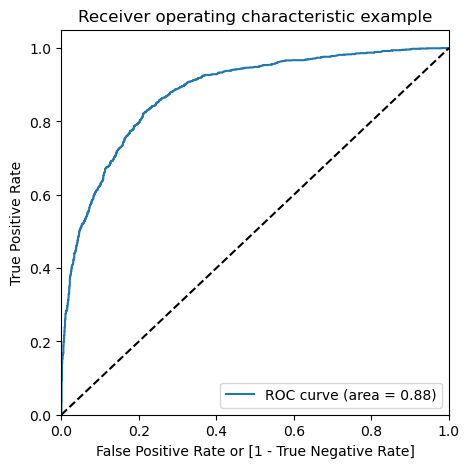

In [240]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [241]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.734967,1,1,1,1,1,1,1,1,1,0,0
1,0,0.197343,0,1,1,0,0,0,0,0,0,0,0
2,0,0.036964,0,1,0,0,0,0,0,0,0,0,0
3,0,0.085026,0,1,0,0,0,0,0,0,0,0,0
4,1,0.975587,1,1,1,1,1,1,1,1,1,1,1


#### Finding the optimal cut-off point

In [243]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.438932  1.000000  0.000000
0.1   0.1  0.585727  0.981494  0.276112
0.2   0.2  0.740644  0.933245  0.589969
0.3   0.3  0.788512  0.871117  0.723888
0.4   0.4  0.800406  0.808989  0.793692
0.5   0.5  0.795474  0.736286  0.841779
0.6   0.6  0.791703  0.675479  0.882627
0.7   0.7  0.770525  0.571712  0.926060
0.8   0.8  0.734262  0.436880  0.966908
0.9   0.9  0.676820  0.278916  0.988108


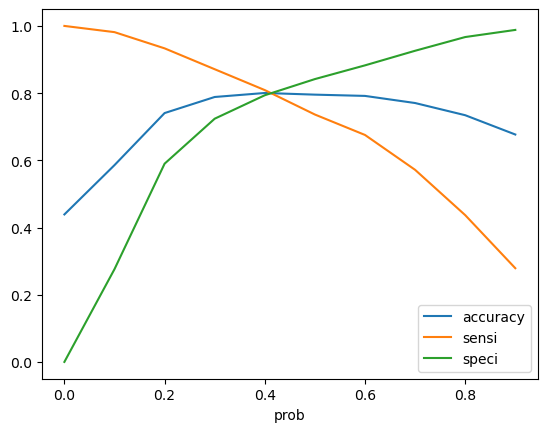

In [244]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [245]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.734967,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.197343,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.036964,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.085026,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.975587,1,1,1,1,1,1,1,1,1,1,1,1


In [246]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.800406150275602

In [247]:
# Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1535,  399],
       [ 289, 1224]], dtype=int64)

In [248]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [249]:
# Calculating sensitivity
TP / float(TP+FN)

0.8089887640449438

In [250]:
# Calculating specificity
TN / float(TN+FP)

0.7936918304033092

In [251]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2063081695966908


In [252]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7541589648798521


In [253]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8415570175438597


### Making predictions on the Test set

In [254]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [255]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Unreachable,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
4752,0,-0.706934,0,0,1,0,0,0,0
7268,0,1.396151,0,0,1,0,0,1,0
2815,1,0.458653,0,0,0,0,0,0,0
4532,0,1.719426,0,0,0,0,0,1,0
9198,0,-1.071517,0,0,0,0,0,1,0


In [256]:
X_test_sm = sm.add_constant(X_test)

In [257]:
y_test_pred = res.predict(X_test_sm)

In [258]:
y_test_pred[:10]

4752    0.301657
7268    0.962535
2815    0.140132
4532    0.935615
9198    0.360034
2483    0.885566
7361    0.212453
4837    0.917631
1750    0.680714
6653    0.591957
dtype: float64

In [259]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [260]:
# Let's see the head
y_pred_1.head()

,0
4752,0.301657
7268,0.962535
2815,0.140132
4532,0.935615
9198,0.360034


In [261]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [262]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [263]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [264]:
y_pred_final.head()

,Converted,0
0,0,0.301657
1,1,0.962535
2,0,0.140132
3,1,0.935615
4,0,0.360034


In [265]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [268]:
y_pred_final.head()

,Converted,Converted_Prob
0,0,0.301657
1,1,0.962535
2,0,0.140132
3,1,0.935615
4,0,0.360034


In [269]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [270]:
y_pred_final.head()

,Converted,Converted_Prob,final_predicted
0,0,0.301657,0
1,1,0.962535,1
2,0,0.140132,0
3,1,0.935615,1
4,0,0.360034,0


In [272]:
# overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7895805142083897

In [273]:
#creating confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[628, 185],
       [126, 539]], dtype=int64)

In [274]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [275]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8105263157894737

In [276]:
# Let us calculate specificity
TN / float(TN+FP)

0.7724477244772447

#### Precision and Recall

In [277]:
#Precision and Recall
from sklearn.metrics import precision_score, recall_score

In [278]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7845070422535211

In [279]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7362855254461335

#### Plotting the precision recall curve

In [280]:
from sklearn.metrics import precision_recall_curve

In [281]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 3442    0
 3443    1
 3444    0
 3445    1
 3446    0
 Name: Converted, Length: 3447, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       1
        ..
 3442    0
 3443    1
 3444    0
 3445    0
 3446    0
 Name: predicted, Length: 3447, dtype: int64)

In [282]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

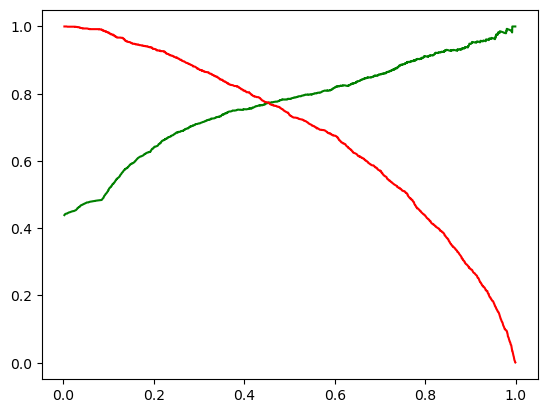

In [283]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [284]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.734967,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.197343,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.036964,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.085026,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.975587,1,1,1,1,1,1,1,1,1,1,1,1


In [285]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7986655062373078

In [286]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1574,  360],
       [ 334, 1179]], dtype=int64)

In [287]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [290]:
# Calculating Precision
TP / float(TP+FP)

0.7660818713450293

In [292]:
# Calculating Recall
TP / float(TP+FN)

0.7792465300727033